In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

path_to_data = 'drive/My Drive/DSGA1006_PROJECT/'

In [ ]:
data = pd.read_csv(path_to_data + "Simulator.csv")

In [ ]:
conditions = [(data['raytrace'] == 1), (data['swaptions'] == 1), (data['blackscholes'] == 1), (data['canneal'] == 1), (data['fluidanimate'] == 1)]
names = ['raytrace', 'swaptions', 'blackscholes', 'canneal', 'fluidanimate']
ids = [0, 1, 2, 3, 4]

data['program_name'] = np.select(conditions, names)
data['program_id'] = np.select(conditions, ids)

In [ ]:
X = data[['committed_instructions_per_cycle', 'instructions', 'accesses_mod_shared_mm', 'accesses_mod_shared_l3', 'hits_mod_shared_l3', 'misses_mod_shared_l3', 'reads_mod_shared_l3', 'writes_mod_shared_l3', 'dispatch_ipc', 'issue_ipc', 'commit_ipc', 'commit_pred_acc', 'issue_commit_totals_diff', 'dispatch_issue_totals_diff']]
Y = data[['program_name']]

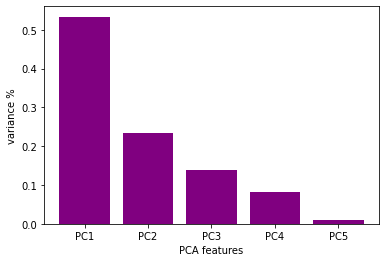

In [ ]:
pca = PCA(n_components=5, random_state=1)
pca_components = pca.fit_transform(X)
pca_result = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

plt.bar(pca_result.columns, pca.explained_variance_ratio_, color='purple')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.5338388 , 0.23307404, 0.13814732, 0.08165074, 0.00949348])

In [ ]:
# Keep top 3 pricipal components
data_pca = pd.concat([Y, pca_result[['PC1', 'PC2', 'PC3']]], axis=1)
pca_known = data_pca[data_pca.program_name != 'fluidanimate']
# pca_unknown = data_pca[data_pca.program_name == 'fluidanimate'].values.tolist()

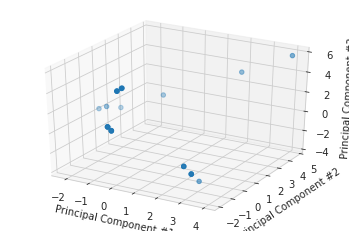

In [ ]:
sns.set_style('whitegrid')

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

x = pca_known['PC1']
y = pca_known['PC2']
z = pca_known['PC3']

ax.set_xlabel('Principal Component #1')
ax.set_ylabel('Principal Component #2')
ax.set_zlabel('Principal Component #3')

ax.scatter(y, z, x)
plt.show()

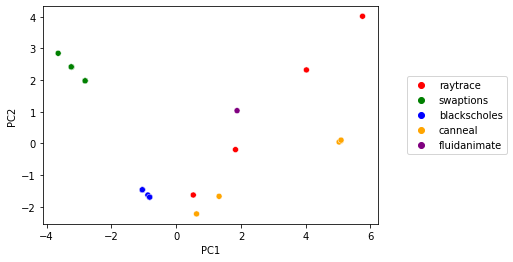

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=pca_known, hue='program_name', palette=['red', 'green', 'blue', 'orange', 'purple'])
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

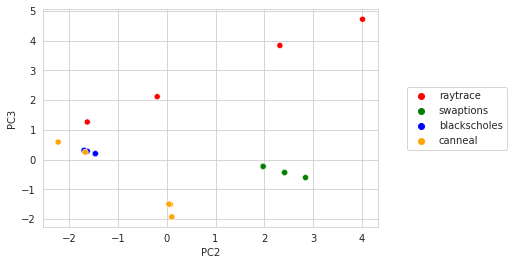

In [ ]:
sns.scatterplot(x='PC2', y='PC3', data=pca_known, hue='program_name', palette=['red', 'green', 'blue', 'orange'])
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

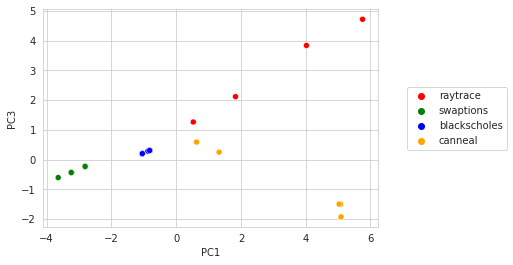

In [ ]:
sns.scatterplot(x='PC1', y='PC3', data=pca_known, hue='program_name', palette=['red', 'green', 'blue', 'orange'])
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

In [ ]:
pca_known_centroid = pca_known.groupby('program_name').mean().values.tolist()

In [ ]:
def calculate_distance(centroid_coordinate, unk_coordinate):
    distances = []
    for centroid in centroid_coordinate: 
        distances.append(distance.euclidean(centroid, unk_coordinate))
    return np.argmax(distances)

In [ ]:
program_dict = {0: 'blackscholes', 1: 'canneal', 2: 'raytrace', 3: 'swaptions'}

for unk_program in pca_unknown: 
    outlier = program_dict[calculate_distance(pca_known_centroid, unk_program[1:])]
    print(outlier)

swaptions
swaptions
swaptions


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, learning_rate=20, perplexity=6, random_state=1)
X_embedded = tsne.fit_transform(X)
tsne_result = pd.DataFrame(data=X_embedded, columns=['PC1', 'PC2', 'PC3'])
data_tsne = pd.concat([Y, tsne_result[['PC1', 'PC2']]], axis=1)

In [ ]:
tsne_known = data_tsne[data_tsne.program_name != 'fluidanimate']
tsne_unknown = data_tsne[data_tsne.program_name == 'fluidanimate'].values.tolist()

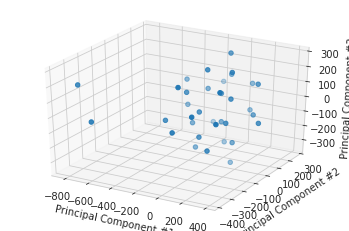

In [ ]:
sns.set_style('whitegrid')

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

x = tsne_known['PC1']
y = tsne_known['PC2']
z = tsne_known['PC3']

ax.set_xlabel('Principal Component #1')
ax.set_ylabel('Principal Component #2')
ax.set_zlabel('Principal Component #3')

ax.scatter(y, z, x)
plt.show()

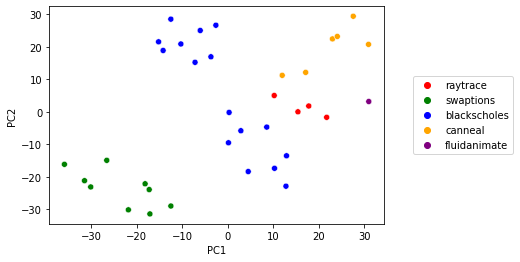

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=tsne_known, hue='program_name', palette=['red', 'green', 'blue', 'orange', 'purple'])
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

In [ ]:
data_tsne = pd.concat([Y, tsne_result], axis=1)
tsne_known = data_tsne[data_tsne.program_name != 'fluidanimate']
tsne_unknown = data_tsne[data_tsne.program_name == 'fluidanimate'].values.tolist()

In [ ]:
tsne_known_centroid = tsne_known.groupby('program_name').mean().values.tolist()

In [ ]:
for unk_program in tsne_unknown: 
    outlier = program_dict[calculate_distance(tsne_known_centroid, unk_program[1:])]
    print(outlier)

swaptions
swaptions
swaptions


Swaption is the most different program from fluidanimate.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[1 1 3 3 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2
 2]
